# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


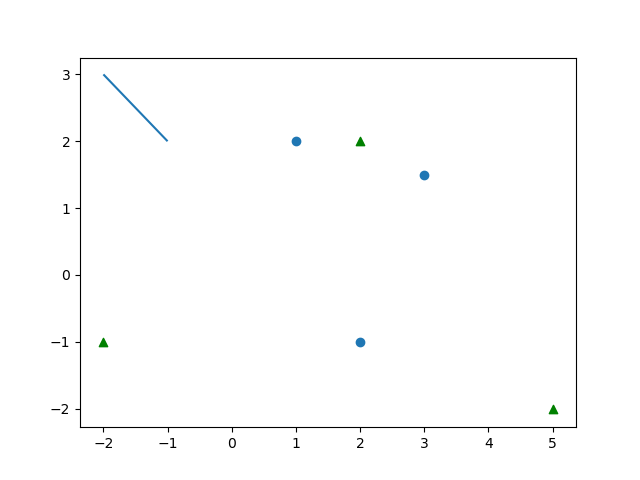

In [15]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
%matplotlib notebook



In [5]:
import random

<IPython.core.display.Javascript object>


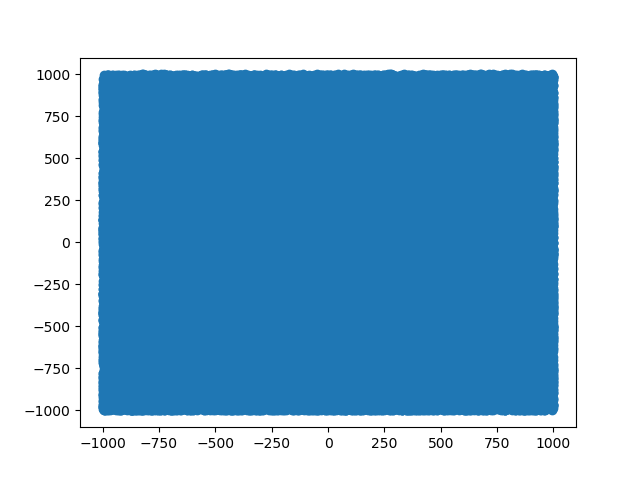

In [16]:
%matplotlib notebook

pkta=[]
for i in range(100000):
    pkta.append((random.random()*2000-1000, random.random()*2000-1000))

    
plot = Plot([PointsCollection(pkta)])
plot.draw()

<IPython.core.display.Javascript object>


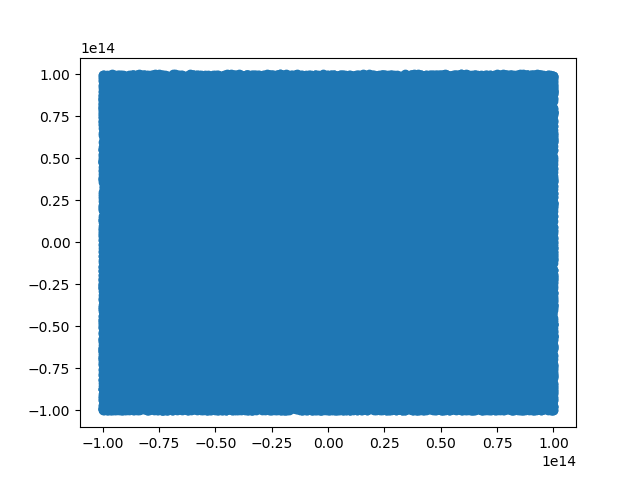

In [17]:
%matplotlib notebook

pktb=[]
for i in range(100000):
    pktb.append((random.random()*2*(1e14)-1e14, random.random()*2*(1e14)-1e14))
    
    
plot = Plot([PointsCollection(pktb)])
plot.draw()

<IPython.core.display.Javascript object>


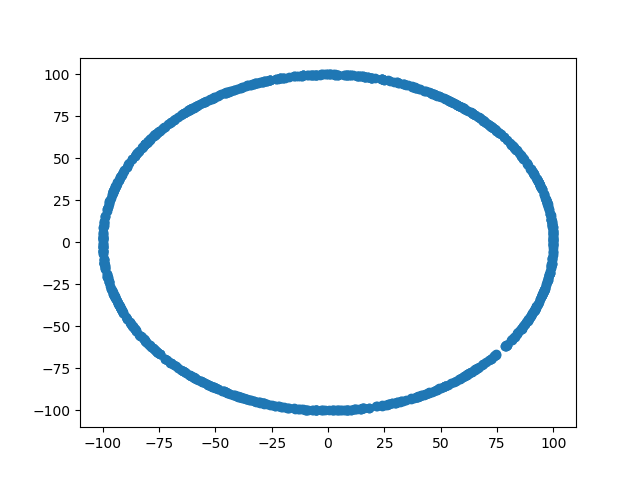

In [18]:
%matplotlib notebook

import math


pktc=[]
for i in range(1000):
    a = 2*math.pi*random.random()
    pktc.append((100*math.cos(a), 100*math.sin(a)))

plot = Plot([PointsCollection(pktc)])
plot.draw() 


<IPython.core.display.Javascript object>


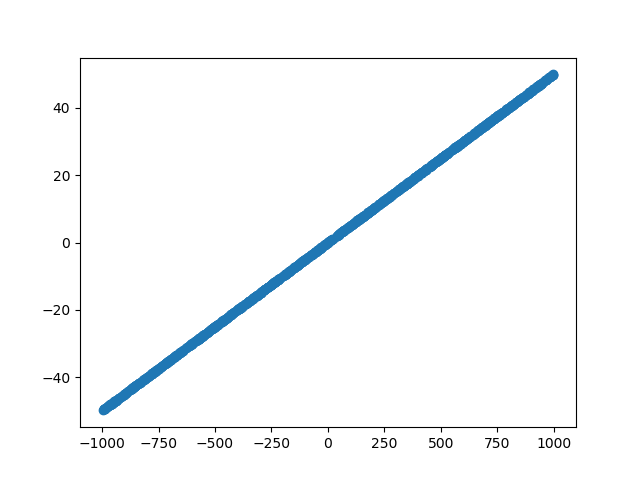

In [19]:
%matplotlib notebook

import math

pktd = []
_x=1.0-(-1.0)
_y=0.1-0.0
sq=math.sqrt(_x**2+_y**2)
v=(_x/sq, _y/sq)
for i in range(1000):
    x=random.random()*1000
    if random.randrange(2)%2==0:
        x=-x
    pktd.append((v[0]*x, v[1]*x+0.05))

plot = Plot([PointsCollection(pktd)])
plot.draw()

In [10]:
import numpy.linalg

def det(c, w=0, a=(-1.0, 0.0), b=(1.0, 0.1)):
    d=((a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1]))
    de=a[0]*b[1]+b[0]*c[1]+c[0]*a[1]-c[0]*b[1]-b[0]*a[1]-a[0]*c[1]
    mat1=[[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]]
    mat2=[[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]]
    if w==0:
        return d
    if w==1:
        return de
    if w==2:
        return numpy.linalg.det(mat1)
        #pass
    if w==3:
        return numpy.linalg.det(mat2)
    

lewa: 49847
pokrywające: 0
prawa: 50153


<IPython.core.display.Javascript object>


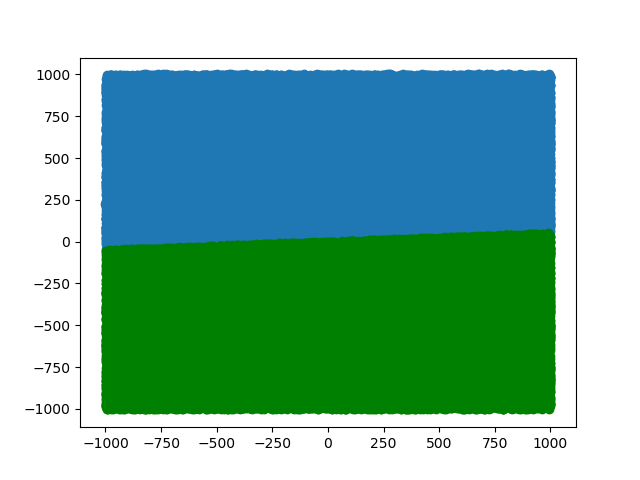

In [20]:
%matplotlib notebook

eps=1e-14

pktal=[]
pktap=[]
pktar=[]

for i in range(100000):
    d=det(pkta[i], 3)
    if abs(d)<eps:
        pktap.append(pkta[i])
    elif d>eps:
        pktal.append(pkta[i])
    else:
        pktar.append(pkta[i])

print("lewa: "+str(len(pktal)))
print("pokrywające: "+str(len(pktap)))
print("prawa: "+str(len(pktar)))
        

#plot = Plot([PointsCollection(pktal), 
#             PointsCollection(pktar, color = 'green')])
#plot.draw()


plot = Plot([PointsCollection(pktal),
            PointsCollection(pktar, color = 'green'), 
            PointsCollection(pktap, color = 'red')])
plot.draw()  

lewa: 49832
pokrywające: 5
prawa: 50163


<IPython.core.display.Javascript object>


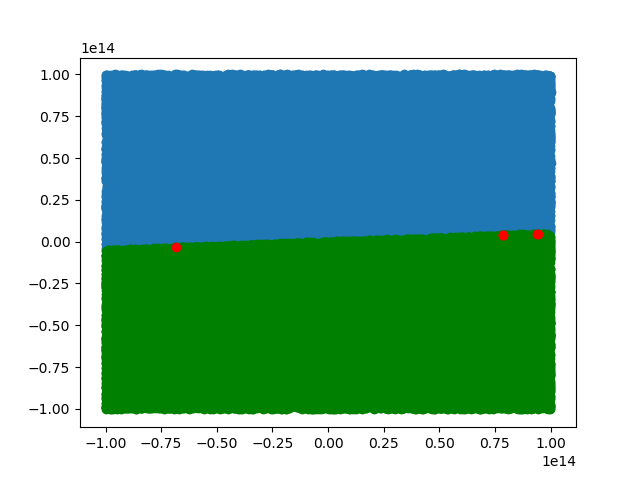

In [22]:
%matplotlib notebook

eps=1e-9
#eps=1e-5

pktbl=[]
pktbp=[]
pktbr=[]

for i in range(100000):
    d=det(pktb[i], 0)
    #d=det(pktb[i], 1)
    if abs(d)<eps:
        pktbp.append(pktb[i])
    elif d>eps:
        pktbl.append(pktb[i])
    else:
        pktbr.append(pktb[i])

print("lewa: "+str(len(pktbl)))
print("pokrywające: "+str(len(pktbp)))
print("prawa: "+str(len(pktbr)))

#plot = Plot([PointsCollection(pktal), 
#             PointsCollection(pktar, color = 'green')])
#plot.draw()

plot = Plot([PointsCollection(pktbl),
            PointsCollection(pktbr, color = 'green'), 
            PointsCollection(pktbp, color = 'red')])
plot.draw()

lewa: 514
pokrywające: 0
prawa: 486


<IPython.core.display.Javascript object>


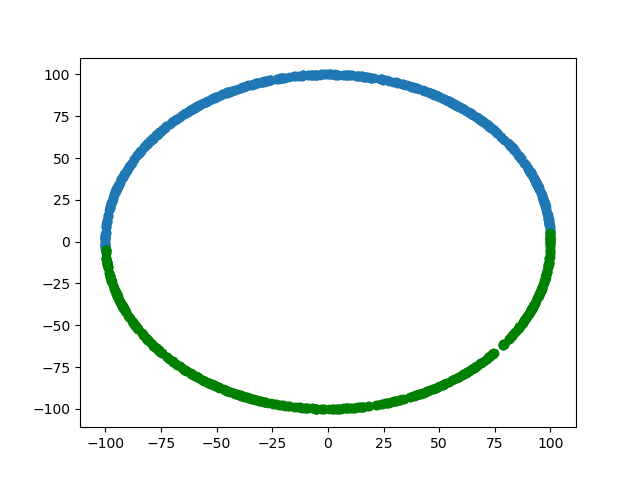

In [21]:
%matplotlib notebook

eps=1e-16

pktcl=[]
pktcp=[]
pktcr=[]

for i in range(1000):
    d=det(pktc[i], 1)
    if abs(d)<eps:
        pktcp.append(pktc[i])
    elif d>eps:
        pktcl.append(pktc[i])
    else:
        pktcr.append(pktc[i])

print("lewa: "+str(len(pktcl)))
print("pokrywające: "+str(len(pktcp)))
print("prawa: "+str(len(pktcr)))
        

#plot = Plot([PointsCollection(pktal), 
#             PointsCollection(pktar, color = 'green')])
#plot.draw()


plot = Plot([PointsCollection(pktcl),
            PointsCollection(pktcr, color = 'green'), 
            PointsCollection(pktcp, color = 'red')])
plot.draw()

lewa: 36
pokrywające: 835
prawa: 129


<IPython.core.display.Javascript object>


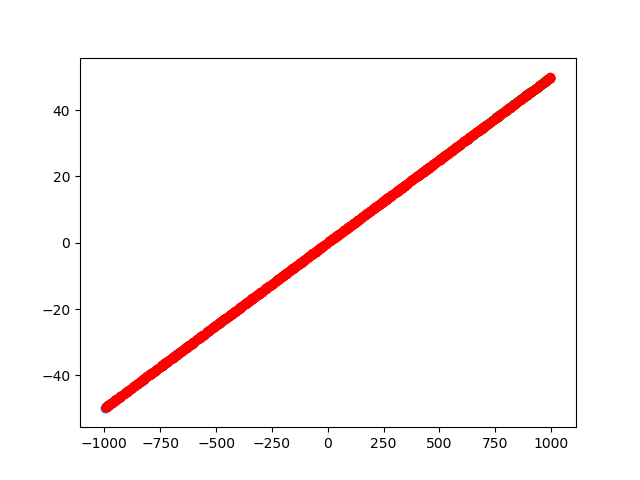

In [14]:
%matplotlib notebook

eps=1e-14

pktdl=[]
pktdp=[]
pktdr=[]

for i in range(1000):
    d=det(pktd[i], 3)
    if abs(d)<eps:
        pktdp.append(pktd[i])
    elif d>eps:
        pktdl.append(pktd[i])
    else:
        pktdr.append(pktd[i])

print("lewa: "+str(len(pktdl)))
print("pokrywające: "+str(len(pktdp)))
print("prawa: "+str(len(pktdr)))
        


plot = Plot([PointsCollection(pktdl),
            PointsCollection(pktdr, color = 'green'), 
            PointsCollection(pktdp, color = 'red')])
plot.draw()